In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [34]:
publication_rec = pd.read_csv('Scopus-28061-Analyze-Year-patent.csv', skiprows=7)
publication_rec = publication_rec.sort_values(by = ['YEAR'])
publication_rec.head()

,YEAR,Num_of_pub
61,1962,86
60,1963,90
59,1964,113
58,1965,194
57,1966,235


In [35]:
# Calculate cumulative number
cumulative_num = []
for idx, num in enumerate(publication_rec.Num_of_pub):
    if idx == 0:
        cumu_num = num
    else: 
        cumu_num += num
    cumulative_num.append(cumu_num)

publication_rec['CGR'] = cumulative_num
publication_rec = publication_rec.sort_values(by = ['YEAR'], ascending=False)
publication_rec['perct'] = '(' + (100 * publication_rec.Num_of_pub/sum(publication_rec.Num_of_pub)).round(2).astype(str) + '%' + ')'
publication_rec.head()

,YEAR,Num_of_pub,CGR,perct
0,2023,115375,1121062,(10.29%)
1,2022,107969,1005687,(9.63%)
2,2021,97310,897718,(8.68%)
3,2020,91084,800408,(8.12%)
4,2019,77332,709324,(6.9%)


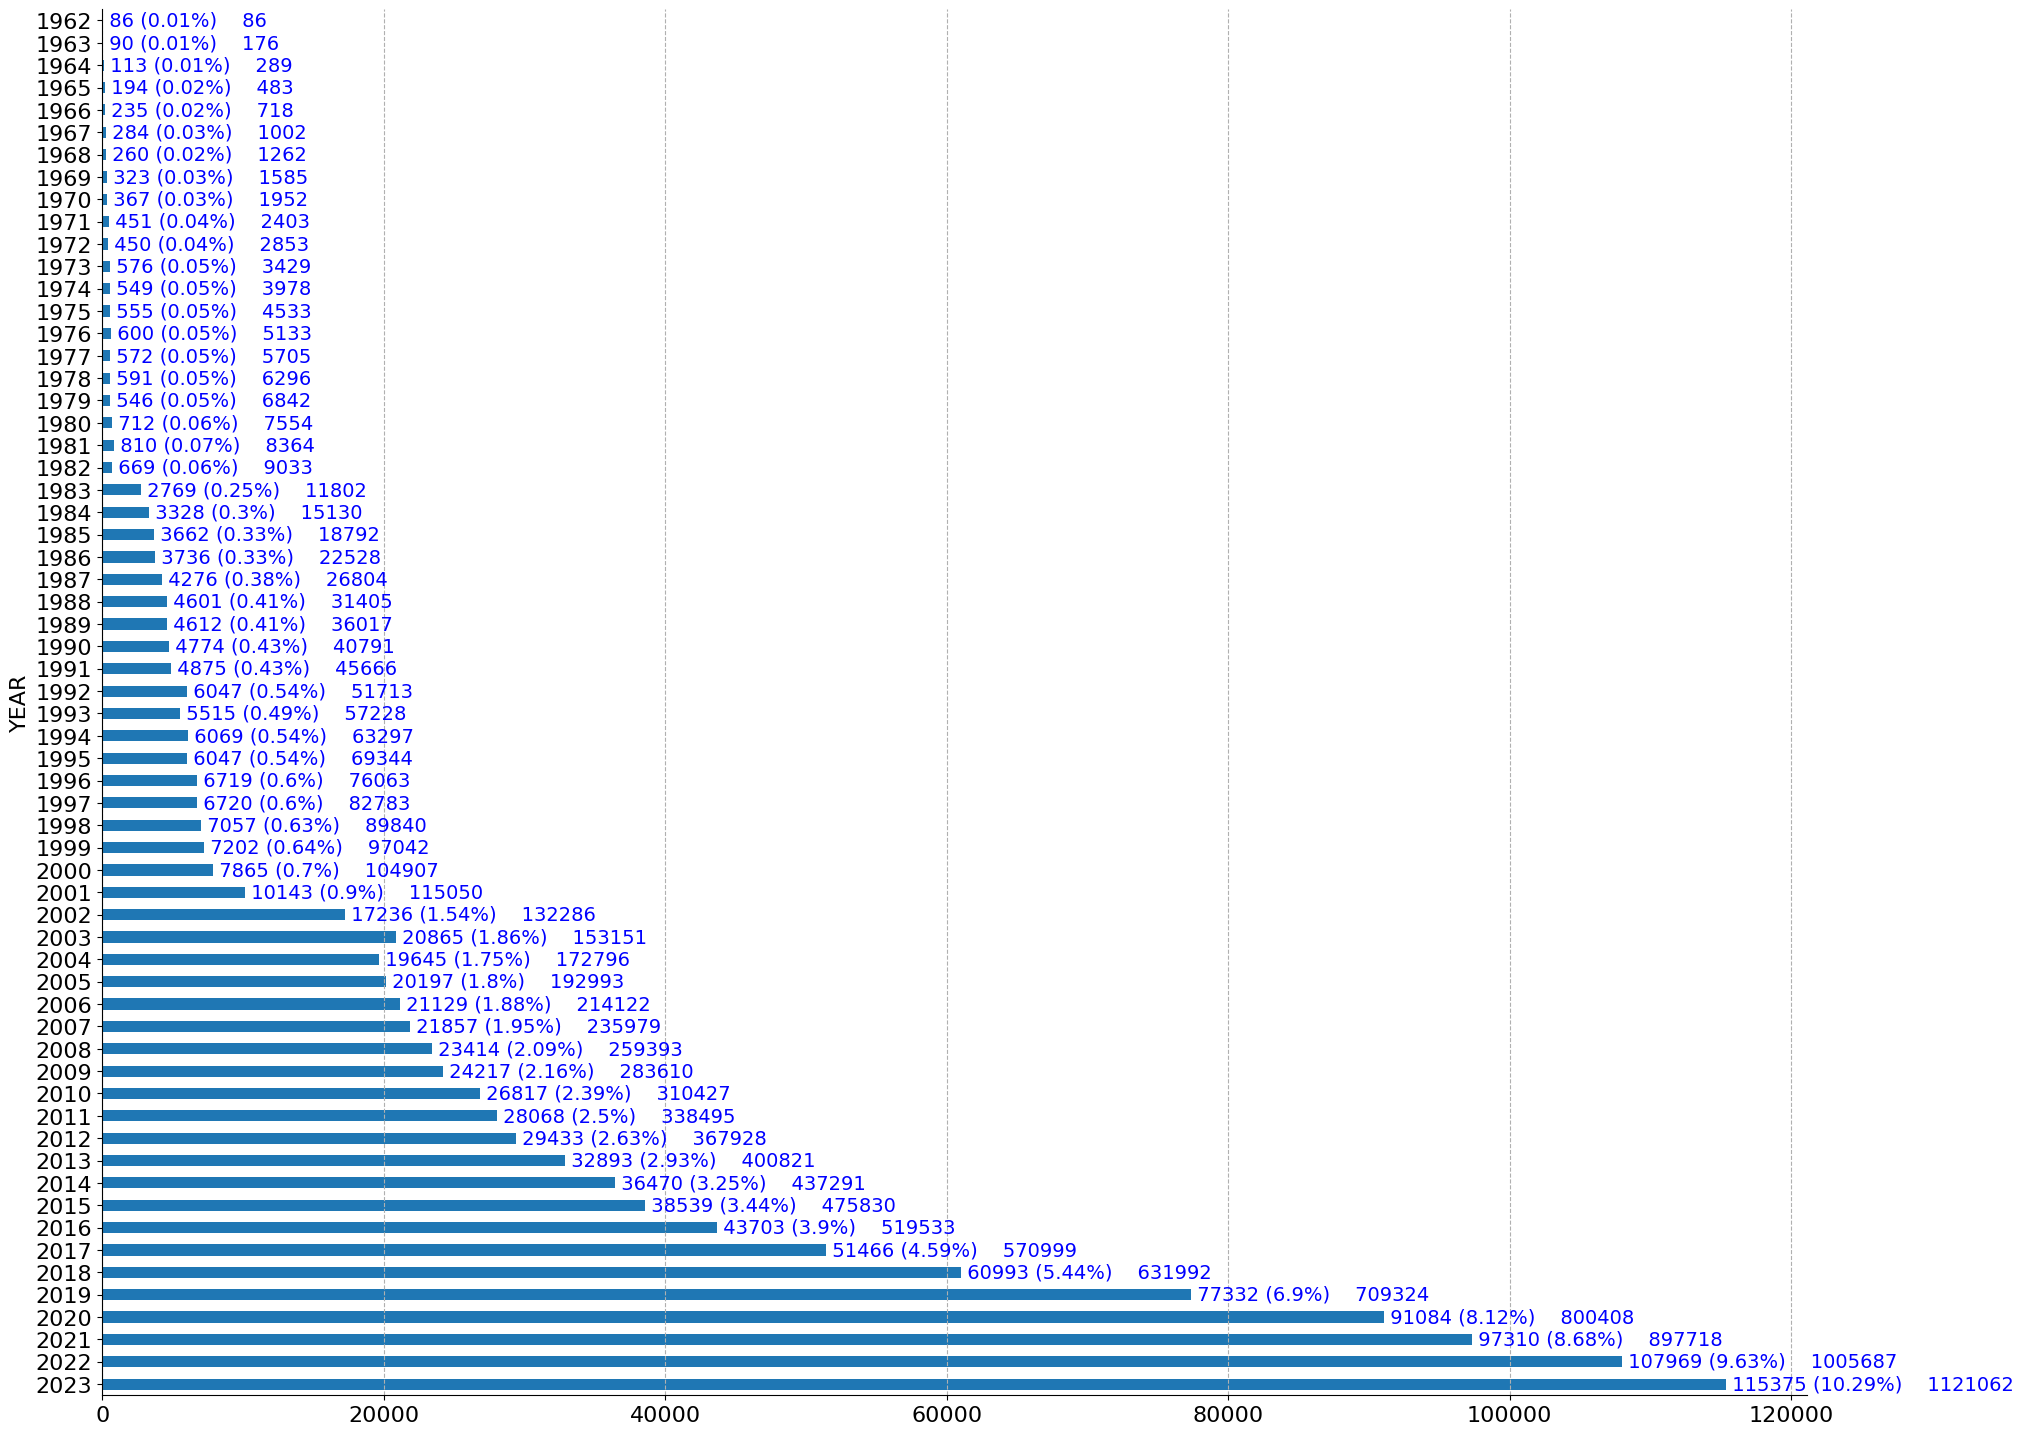

In [38]:
ax = publication_rec.plot(kind = 'barh', x = 'YEAR', y = 'Num_of_pub', figsize = (22, 18), legend = False, fontsize=16)
# customize the label to include the percent
labels = [f' {v.get_width()} {publication_rec.iloc[i, 3]}    {publication_rec.iloc[i, 2]}' for i, v in enumerate(ax.containers[0])]
ax.bar_label(ax.containers[0], labels=labels, label_type='edge', size=14, color = 'blue')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid('on', which='minor', axis='x', linestyle = '--')
ax.grid('off', which='major', axis='x', linestyle = '--')
ax.set_ylabel('YEAR', fontsize = 16)
plt.savefig('images/patents'+'.jpg')